# Credit Default Risk
## Juan Pablo Veliz - Proyecto DS - Coderhouse 

### Entendimiento del Negocio

#### Abstract
Nos referimos como industria de servicios financieros a la amplia oferta de productos y servicios relacionados con la administración del dinero y sus actividades relacionadas, como seguros, procesamiento de pagos, banca digital y préstamos.
Hay muchas partes interesadas que compiten dentro de la industria, incluidos los emisores de tarjetas de crédito, los bancos tradicionales y, más recientemente, varias empresas nuevas generalmente englobadas bajo el nombre de "fintech", que brindan servicios financieros con un enfoque tecnológico muy fuerte. Estos recién llegados han acelerado la tendencia digitalizadora de la industria, que se adapta mejor a las nuevas preferencias de los consumidores, en particular de los jóvenes a los que les gusta administrar sus finanzas desde casa. En este escenario, todas las instituciones financieras y las empresas emergentes están perfeccionando su tecnología y ampliando los servicios remotos.

Hay tres tipos de servicios financieros: personales, de consumo y corporativos. En este proyecto estaremos enfocando nuestra atención en las finanzas de consumo y especialmente en la industria del crédito.
Las finanzas de consumo están presentes en casi todas las decisiones económicas que las personas toman en su vida, como comprar un automóvil o una casa, pagar la universidad o hacer un viaje en vacaciones. Todas estas experiencias por lo general requieren un gran gasto que se puede acomodar a un conveniente flujo de efectivo en cuotas a lo largo del tiempo tomando préstamos.
En el otro lado de la mesa, los prestamistas se arriesgan en cada operación, ya que incurren en pérdidas cuando los clientes no devuelven sus préstamos a tiempo. Desde su punto de vista, el riesgo es deseable porque es representativo de una oportunidad de ganancia que se captura en la tasa de interés, pero demasiado riesgo podría conducir a mayores índices de incumplimiento generando pérdidas masivas y potencialmente la quiebra.
Es por eso que la predicción de incumplimiento crediticio es fundamental para administrar el riesgo en un negocio de préstamos al consumidor, ya que permite a los prestamistas optimizar las decisiones de préstamo y crear una mejor experiencia para el cliente.

En este proyecto, utilizaré un conjunto de datos creado con fines educativos por MachineHack, que contiene 67.463 filas y 35 columnas de datos, incluidos atributos como el monto financiado, el historial crediticio de los prestatarios y el tipo de préstamo, para predecir si una persona será morosa o no.

#### Problemática del Negocio y Enfoque

El conjunto de datos seleccionado simula datos históricos para un "P2P Lending Club". También conocido como crowdlending, P2P es la práctica de personas o empresas no relacionadas que prestan dinero a través de servicios en línea que conectan a los prestamistas con los prestatarios.
Los mercados de préstamos P2P han crecido exponencialmente en los últimos años, por lo que hay espacio para motores de recomendación capaces de mostrar las mejores opciones tanto para inversores como para prestatarios.

Como se comentó anteriormente, estaré trabajando en la hipótesis de que es posible predecir si un préstamo caerá en mora utilizando antecedentes e información financiera histórica sobre el tomador del préstamo y las condiciones del préstamo.

En el camino, podremos encontrar ideas para algunas preguntas relevantes del tema, tales como: ¿Cuánto influye el comportamiento financiero pasado en el futuro? ¿Cuál es el/los atributo/s del consumidor más relevante a considerar en la gestión de riesgos? ¿Qué tipo de préstamo es más riesgoso? ¿Existe alguna condición particular que tenga mayor relevancia en la morosidad de los préstamos?

### Entendimiento de los Datos

#### Importación de Librerías y Definición del Dataset Inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
df = pd.read_csv("https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/train.csv?raw=true")

#### Descripción de los Datos

Se provee una descripción de los datos crudos en el siguiente reporte: [Raw Profiling](https://rawcdn.githack.com/JuanPabloVeliz/Coder-DS/2a50ed123fc79993f443954cee8627644447eed7/Entregables/profiling-raw.html)

In [ ]:
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='profiling-raw.html')

In [2]:
df.head().round(2)

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236                12329.36    59   
1   1450153         3609          11940                12192.00    59   
2   1969101        28276           9311                21603.22    59   
3   6651430        11170           6954                17877.16    59   
4  14354669        16890          13226                13539.93    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922          11.14     B        C4            MORTGAGE  ...   
1     BAT1586599          12.24     C        D3                RENT  ...   
2     BAT2136391          12.55     F        D4            MORTGAGE  ...   
3     BAT2428731          16.73     C        C3            MORTGAGE  ...   
4     BAT5341619          15.01     C        D4            MORTGAGE  ...   

   Recoveries Collection Recovery Fee Collection 12 months Medical  \
0        2.50                    0.79                            0   
1        2.38                    0.97                            0   
2        4.32                    1.02                            0   
3        0.11                    0.75                            0   
4     1294.82                    0.37                            0   

  Application Type  Last week Pay  Accounts Delinquent  \
0       INDIVIDUAL             49                    0   
1       INDIVIDUAL            109                    0   
2       INDIVIDUAL             66                    0   
3       INDIVIDUAL             39                    0   
4       INDIVIDUAL             18                    0   

   Total Collection Amount  Total Current Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2                         26155            0  
3                         60214            0  
4                         22579            0  

[5 rows x 35 columns]

A continuación se detalla la información contenida en el dataset: 

0. Loan ID
1. Loan Amount: Monto del préstamo solicitado.
2. Funded Amount: Monto del préstamo menos cargos prepagos.
3. Funded Amount Investor: en los préstamos P2P, el monto total ofrecido por todos los inversores.
4. Term: Cantidad de tiempo para pagar el préstamo.
5. Batch Enrolled: ID del grupo en el que se registró el préstamo.
6. Interest Rate: Tasa de interés aplicado al préstamo.
7. Grade: Clasificación sociodemográfica, donde A se refiere a mayores ingresos.
8. Sub Grade: Sub-clasificación de Grado (generalmente Grado final ajustado por monto de préstamo y vencimiento de acuerdo a las reglas del mercado P2P).
9. Employment Duration: se refiere a la experiencia laboral del prestatario en el tiempo. (Los datos están errados, los valores en esta columna se refieren en realidad a "Home Ownership").
10. Home Ownership: Tipo de tenencia de la vivienda. (Los datos en el conjunto de datos original no son correctos y probablemente se refieren al Valor de la vivienda).
11. Verification Status: Indica si la información del prestatario ha sido verificada.
12. Payment Plan: Se refiere al acto de hacer pagos iguales de una cantidad predefinida en una frecuencia predefinida. (Faltan datos).
13. Loan Title: Describe el propósito del préstamo.
14. Debit to Income: Razón = monto de pagos de deuda comprometida / ingreso.
15. Delinquency - two years: Veces que el prestatario ha dejado de pagar su deuda a tiempo en los últimos 2 años.
16. Inquires - six months: Veces que el prestatario ha sido consultado (buscado) en una base de datos financiera pública.
17. Open Account: Número de líneas de crédito abiertas en el expediente crediticio del prestatario.
18. Public Record: Número de morosidades por las cuales se han emprendido acciones judiciales por parte de un acreedor.
19. Revolving Balance: La cantidad que el titular de la cuenta toma prestada contra una línea de crédito
20. Revolving Utilities: Razón = Saldo Revolvente / Línea de Crédito Total. No aplicable a préstamos a plazos.
21. Total Accounts: Número total de Cuentas en el expediente de crédito del acreditado.
22. Initial List Status: IIndica si el préstamo debe ser fondeado en su totalidad (w) o permite ser fondeado parcialmente (f) por los inversionistas.
23. Total Received Interest: Cantidad de intereses que se ha pagado por el préstamo actual.
24. Total Received Late Fee: Cantidad de cargos por pago atrasado que se ha pagado por el préstamo actual.
25. Recoveries: Cantidad que ha sido cobrada con servicios de cobranza de terceros.
26. Collection Recovery Fee: Tarifas aplicadas a las recuperaciones.
27. Collection 12 months Medical: Indica si algún solicitante tiene facturas médicas impagas por al menos 12 meses.
28. Application Type: Indica si la solicitud es individual (1 solicitante) o conjunta (2 o más solicitantes).
29. Last week Pay: Monto del pago del préstamo realizado durante la última semana.
30. Accounts Delinquent: Número de cuentas morosas en el expediente crediticio del prestatario. (Todas las filas en el conjunto de datos contienen 0, probablemente faltan datos).
31. Total Collection Amount: La acumulación de créditos adeudados por el prestatario.
32. Total Current Balance: el monto actual de todos los cargos, incluidas las tarifas, los intereses, las multas y los créditos.
33. Total Revolving Credit Limit: Límite de línea de crédito asignado.
34. Loan Status: Indica si el préstamo está mora.

#### Preparación de los datos

De acuerdo a los hallazgos analizando la estructura, procederé a realizar las siguientes transformaciones:
* Cambiar el nombre de las columnas a sus nombres correctos
* Descartar columnas con datos faltantes/inútiles
* Reducción de la cardinalidad en la columna "Loan Title"
* Corrección de valores atípicos en la columna "Collection Recovery Fee"

Un nuevo análisis de los datos preprocesados puede encontrarse en este reporte: [Pre Processed Profiling 2](https://rawcdn.githack.com/JuanPabloVeliz/Coder-DS/37095de3fe9e854059fd925a182e015b2339b617/Entregables/profiling-pre2.html)


In [3]:

df.rename(columns={"Home Ownership": "Home Value", "Employment Duration": "Home Ownership"}, inplace=True)

df.drop(["ID", "Payment Plan", "Accounts Delinquent"], inplace=True, axis=1)

titles = ["Consolidation", "Refinancing"]
df.loc[df["Loan Title"].str.contains(titles[0], case=False), "Loan Title"] = titles[0]
df.loc[df["Loan Title"].str.contains(titles[1], case=False), "Loan Title"] = titles[1]
df.loc[~df["Loan Title"].str.contains('|'.join(titles), case=False), "Loan Title"] = "Other"

fee_median = df["Collection Recovery Fee"].median()
outliers = df["Collection Recovery Fee"] > 2
df.loc[outliers, "Collection Recovery Fee"] = np.nan
df["Collection Recovery Fee"].fillna(fee_median, inplace= True)

In [ ]:
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='profiling-pre2.html')

In [4]:
df.head().round(2)

Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236                12329.36    59     BAT2522922   
1         3609          11940                12192.00    59     BAT1586599   
2        28276           9311                21603.22    59     BAT2136391   
3        11170           6954                17877.16    59     BAT2428731   
4        16890          13226                13539.93    59     BAT5341619   

   Interest Rate Grade Sub Grade Home Ownership  Home Value  ...  \
0          11.14     B        C4       MORTGAGE   176346.63  ...   
1          12.24     C        D3           RENT    39833.92  ...   
2          12.55     F        D4       MORTGAGE    91506.69  ...   
3          16.73     C        C3       MORTGAGE   108286.58  ...   
4          15.01     C        D4       MORTGAGE    44234.83  ...   

  Total Received Late Fee Recoveries  Collection Recovery Fee  \
0                    0.10       2.50                     0.79   
1                    0.04       2.38                     0.97   
2                   18.78       4.32                     1.02   
3                    0.04       0.11                     0.75   
4                   19.31    1294.82                     0.37   

   Collection 12 months Medical  Application Type  Last week Pay  \
0                             0        INDIVIDUAL             49   
1                             0        INDIVIDUAL            109   
2                             0        INDIVIDUAL             66   
3                             0        INDIVIDUAL             39   
4                             0        INDIVIDUAL             18   

   Total Collection Amount  Total Current Balance  \
0                       31                 311301   
1                       53                 182610   
2                       34                  89801   
3                       40                   9189   
4                      430                 126029   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2                         26155            0  
3                         60214            0  
4                         22579            0  

[5 rows x 32 columns]

#### Exploración de Datos (EDA)

Luego de la limpieza inicial, comencemos la fase de exploración de los datos

##### Análisis Multivariados

<AxesSubplot:>

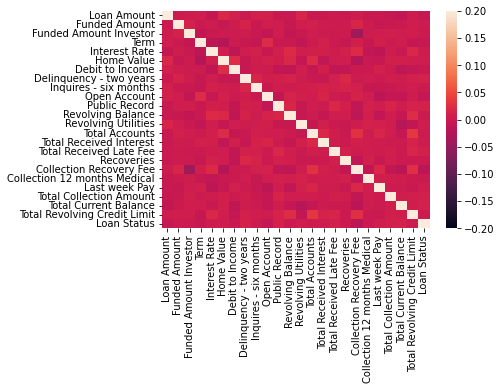

In [5]:
sns.heatmap(df.corr(), xticklabels=df.select_dtypes(include= ["float", "int"]).columns, yticklabels=df.select_dtypes(include= ["float", "int"]).columns, vmax=0.2, vmin=-0.2)

Trazando la matriz de correlación como un heatmap, podemos ver que no hay correlaciones significativas entre los atributos numéricos. Veamos si la situación cambia al tratar las variables ordinales como numéricas y obteniendo variables dummies para el resto de las categóricas. 

<AxesSubplot:>

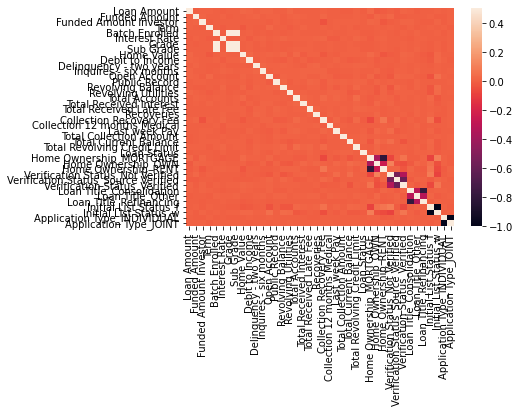

In [6]:
#labels = lista de diccionarios con los nombres de las categorías convertidas para referencia futura
labels = []

#creo un nuevo dataframe sólo a fines de esta prueba
ndf = df.copy()

#ordinals = columnas ordinales que se cambian por numéricas
ordinals = [
ndf["Grade"],
ndf["Sub Grade"],
ndf["Batch Enrolled"]
]

for i in ordinals:
    labels.append({i.name:dict(enumerate(i.sort_values().unique()))})
    ndf[i.name] = pd.factorize(df[i.name].sort_values()) [0]

#para el resto de las variables, obtengo las dummies
ndf = pd.get_dummies(ndf)

sns.heatmap(ndf.corr(), xticklabels=ndf.columns, yticklabels=ndf.columns, vmax=0.5)

La nueva matriz de correlaciones arroja algo de nueva información.
Como se esperaba, existe la correlación positiva entre las variables "Grade" y "Sub Grade". Sorprendentemente también existe una fuerte correlación positiva de la variable "Batch Enrolled" con "Grade" y "Sub Grade".

Respecto a las nuevas variables dummies, como es esperable aparecen correlaciones negativas entre aquellas que pertenecen a la misma categoría original. También aparecieron nuevas correlaciones con las variables originales que puede ser conveniente investigar con mayor profundidad.

In [7]:
#creo 2 dataframes separando las variables categóricas de las numércas
cat_df = ndf.drop([ 
    "Loan Amount", 
    "Funded Amount", 
    "Funded Amount Investor", 
    "Batch Enrolled", 
    "Interest Rate", 
    "Grade",
    "Sub Grade",
    "Home Value",
    "Debit to Income",
    "Open Account",
    "Revolving Balance",
    "Revolving Utilities",
    "Total Accounts",
    "Total Received Interest",
    "Total Received Late Fee",
    "Recoveries",
    "Collection Recovery Fee",
    "Last week Pay",
    "Total Collection Amount",
    "Total Current Balance",
    "Total Revolving Credit Limit"], 
    axis=1)
    
num_df = ndf[["Loan Amount", 
    "Funded Amount", 
    "Funded Amount Investor", 
    "Batch Enrolled", 
    "Interest Rate", 
    "Grade",
    "Sub Grade",
    "Home Value",
    "Debit to Income",
    "Open Account",
    "Revolving Balance",
    "Revolving Utilities",
    "Total Accounts",
    "Total Received Interest",
    "Total Received Late Fee",
    "Recoveries",
    "Collection Recovery Fee",
    "Last week Pay",
    "Total Collection Amount",
    "Total Current Balance",
    "Total Revolving Credit Limit",
    "Loan Status"]]

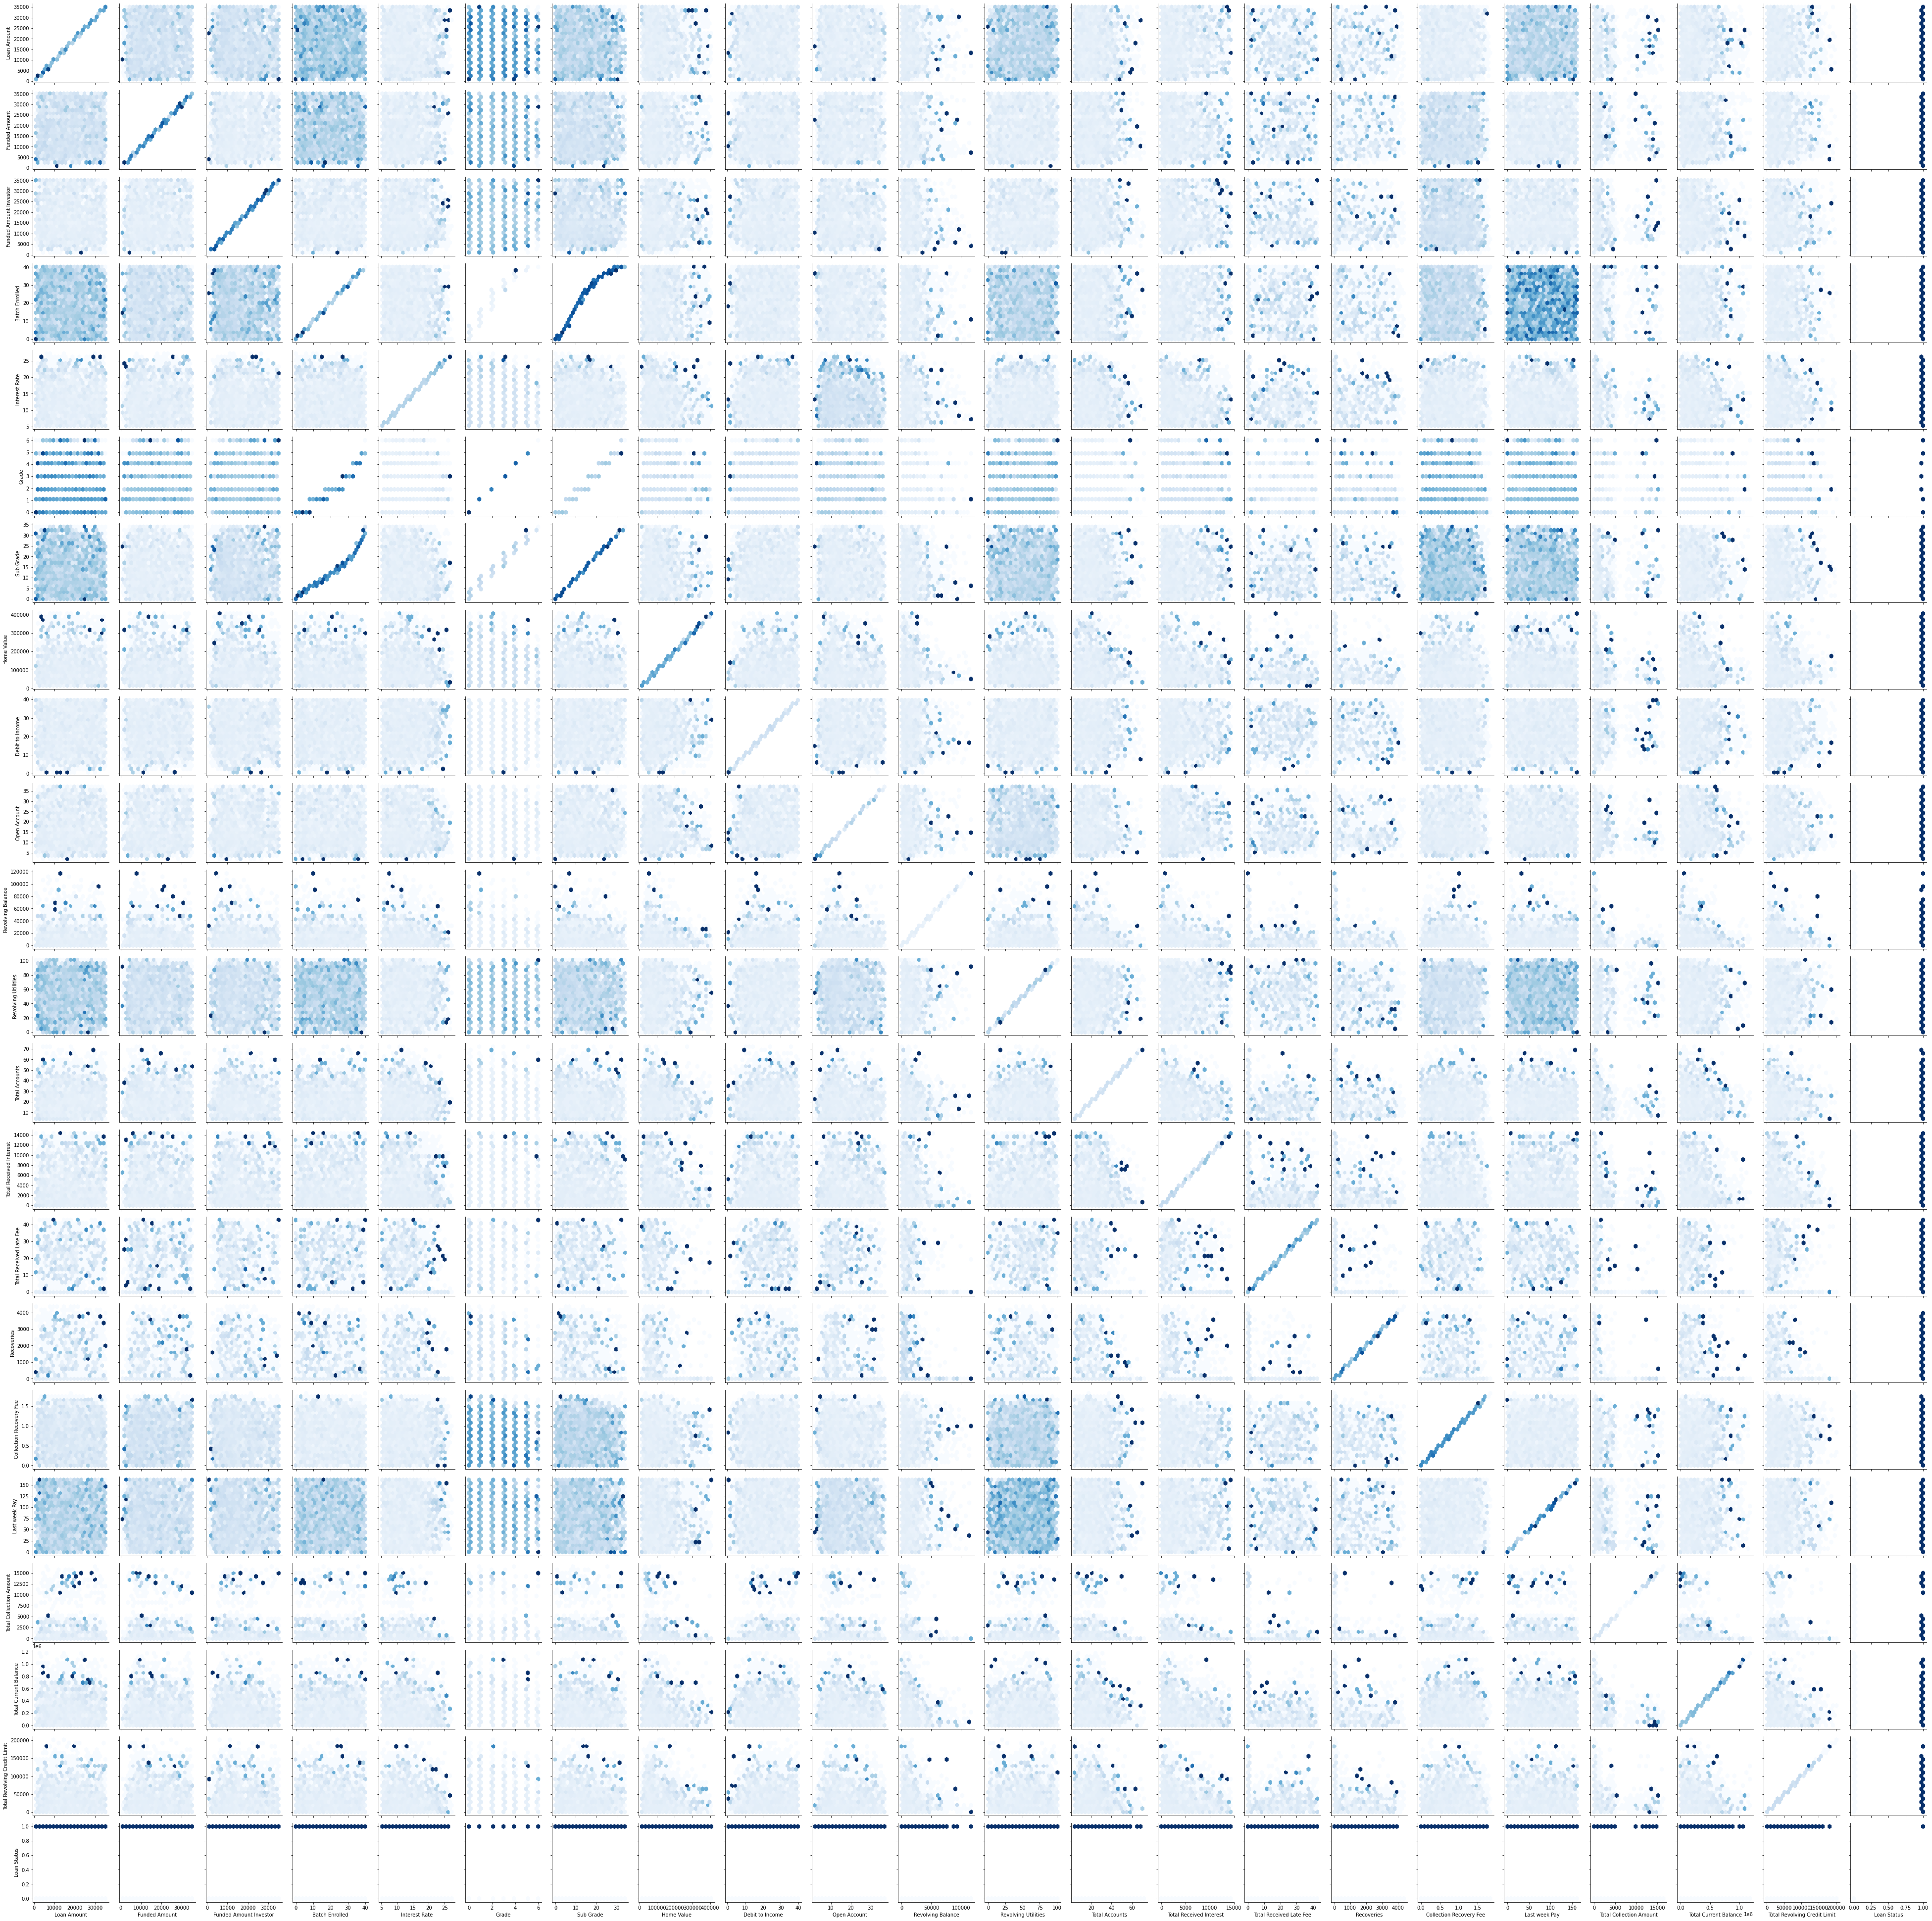

In [14]:
def hexbin(x, y, color, **kwargs):
    plt.hexbin(x, y, C=num_df["Loan Status"], gridsize=20, cmap="Blues")

g = sns.PairGrid(num_df)
g.map(hexbin)

La grilla muestra la concentración de préstamos defaulteados en relación con cada par de variables numéricas del dataset.
Un repaso nos permite extraer algunos insights:
* "Loan Amount": Concentra mayor proporción de default en los montos pequeños.
* "Interest Rate": La tasa de interés, cuanto mayor, tiende a aumentar la probabilidad de default, pero no en todos los casos. Pierde su relevancia al analizarla junto con "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Collection Amount", "Total Current Balance" y "Total Revolving Credit Limit".
* "Revolving Balance": Concentra mayor proporción de default en los montos altos.
* "Revolving Utilities": la mayor porporción de default tienden a estar en los valores más pequeños y los más altos, la proporción en menor en los valores medios. Se distibuye casi homogéneamente por todo el espectro cuando se la analiza junto con "Loan Amount, "Batch Enrolled" y "Last Week Pay".
* "Total Collection Amount": Concentra mayor proporción de default en los montos altos y luego en los montos bajos. Baja considerablmente la concentración en los montos medios.

##### Análisis Bivariados

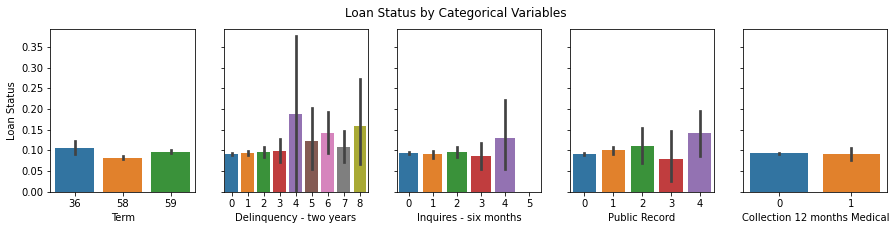

In [8]:
fig, axs = plt.subplots(ncols=5, figsize=(15,3), sharey=True)
fig.suptitle("Loan Status by Categorical Variables")

pos = 0
for col in cat_df.columns[:5]:
    sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])

    if pos > 0:
        axs[pos].set(ylabel=None)

    pos += 1

Observando el comportamiento de la variable objetivo (Loan Status), de acuerdo a un conjunto de variables categóricas encontramos estos insights:
* Los tomadores que tienen 4, 8 y 6 informes de "Delinquency" en los últimos 2 años tienen mayor tendencia hacia el default.
* Los tomadores que tienen 4 "Inquires" en los últimos 6 meses sonmás propensos a defaultear.
* Los tomadores que tienen 4 "Public records" son más propensos a defaultear. 
* El plazo del préstamo y las facturas médica impagas no infieren de manera relevante en la probabilidad de defaultear.


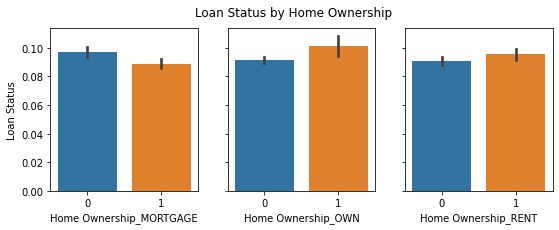

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Home Ownership")

pos = 0
for col in [col for col in cat_df.columns if "Home Ownership" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1
    
    

Analizando la variable "Home Ownership" frente a la variable objetivo, se observa que los dueños de sus viviendas tienen una tendencia a defaultear apenas por encima de aquellos que tienen hipoteca o alquilan. No parece ser una variable muy relevante.

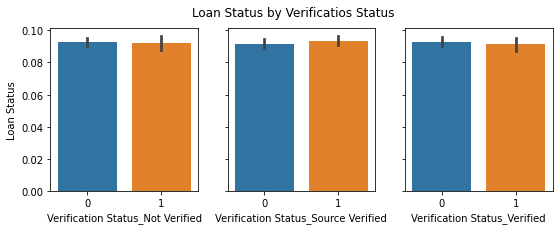

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Verificatios Status")

pos = 0
for col in [col for col in cat_df.columns if "Verification" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando los posibles estados de la variable "Verification Status" frente a la variable objetivo no se observan diferencias significativas.

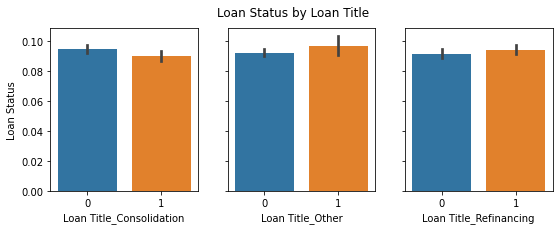

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Loan Title")

pos = 0
for col in [col for col in cat_df.columns if "Title" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando la variable "Loan Title" frente a la variable objetivo no se observan diferencias significativas.

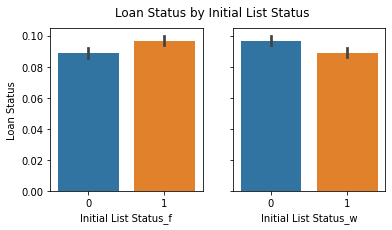

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(6,3), sharey=True)
fig.suptitle("Loan Status by Initial List Status")

pos = 0
for col in [col for col in cat_df.columns if "Initial" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando la variable "Initial list status", se observa que los préstamos que son listados para poder ser fondeados parcialmente tiene una tendencia apenas mayor a ser defaulteados que los que se setean para ser fondeados en su totalidad.

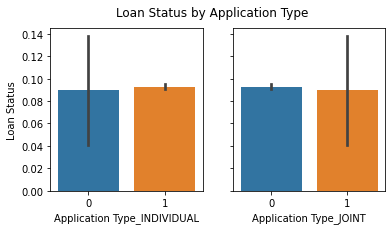

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(6,3), sharey=True)
fig.suptitle("Loan Status by Application Type")

pos = 0
for col in [col for col in cat_df.columns if "Application" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Por último, observando la variable "Application type" no se encuentras diferencias significaticas en la media. Sin embargo, es llamativo que en el caso de las aplicaciones conjuntas la dispersión es muy alta.